## 1.0 Libraries

In [1]:
import pickle
import scipy as sp
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set()

## 2.0 Data Ingestion

In [2]:
df_raw = pd.read_csv("data\segmentation data.csv", index_col=0)

## 3.0 Data Description

In [3]:
df_raw.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,2000.0,0.4570,0.498272,0.0,0.00,0.0,1.00,1.0
Marital status,2000.0,0.4965,0.500113,0.0,0.00,0.0,1.00,1.0
Age,2000.0,35.9090,11.719402,18.0,27.00,33.0,42.00,76.0
Education,2000.0,1.0380,0.599780,0.0,1.00,1.0,1.00,3.0
Income,2000.0,120954.4190,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0
Occupation,2000.0,0.8105,0.638587,0.0,0.00,1.0,1.00,2.0
Settlement size,2000.0,0.7390,0.812533,0.0,0.00,1.0,1.00,2.0


In [5]:
df_raw.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


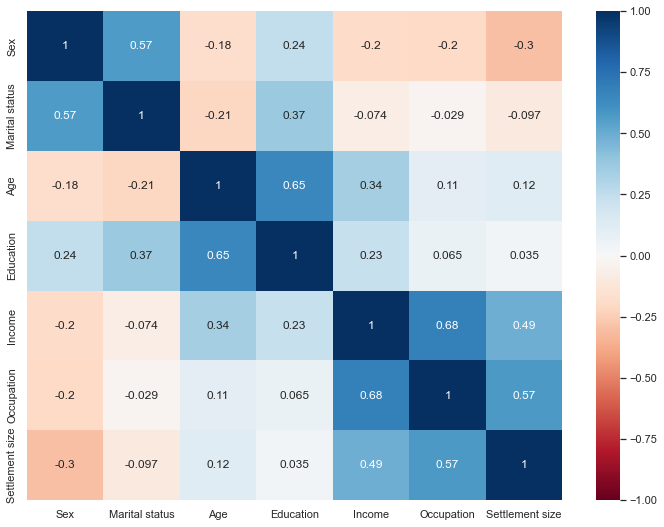

In [6]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df_raw.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

Text(0, 0.5, 'Income')

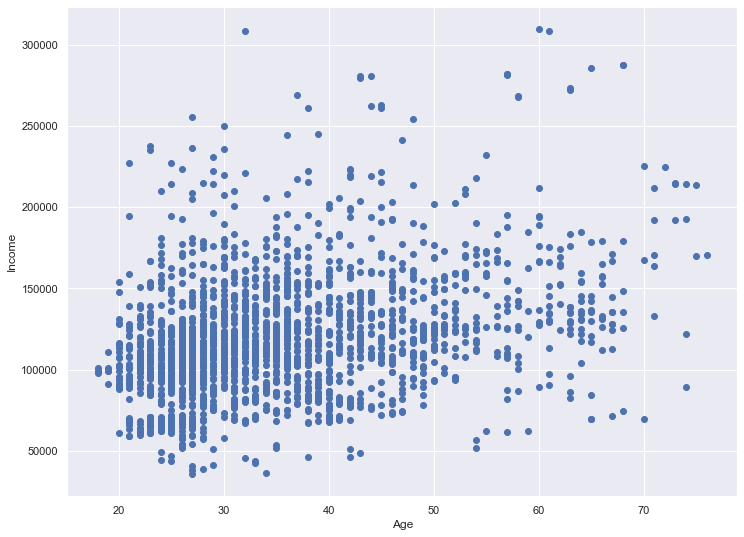

In [7]:
plt.figure(figsize=(12, 9))

plt.scatter(x=df_raw['Age'], y=df_raw['Income'])

plt.xlabel('Age')
plt.ylabel('Income')

## 4.0 Data Preparation

In [8]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_raw)

## 5.0 Clustering

### 5.1 Hierarchical Clustering

In [9]:
hier_cluster = linkage(segmentation_std, method='ward')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

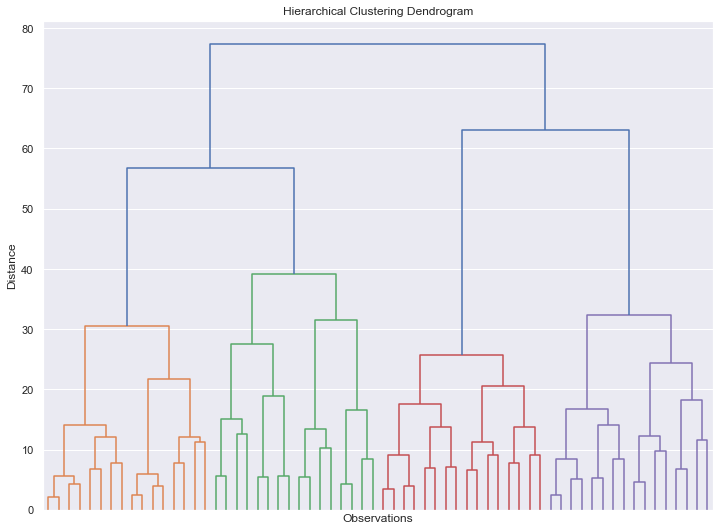

In [10]:
plt.figure(figsize=(12, 9))

dendrogram(hier_cluster, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True)#, color_threshold=0)

plt.xlabel('Observations')
plt.ylabel('Distance')

plt.title('Hierarchical Clustering Dendrogram')

### 5.2 $k$-means

In [11]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

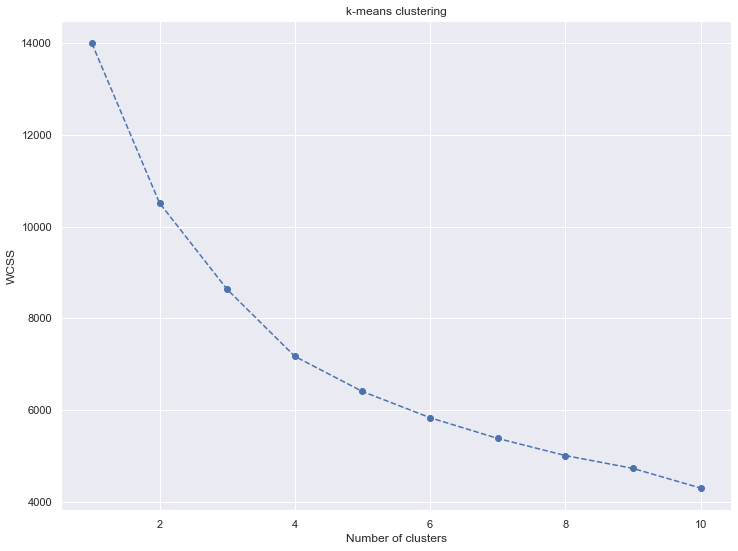

In [12]:
plt.figure(figsize=(12, 9))

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.title('k-means clustering')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [14]:
df_segm_kmeans = df_raw.copy()
df_segm_kmeans['Segment k-means'] = kmeans.labels_

In [15]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment k-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment k-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [16]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment k-means', 'Sex']].groupby(['Segment k-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment k-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [17]:
df_segm_analysis.rename({0: 'well-off', 1: 'fewer-opportunities', 2: 'standard', 3: 'career-focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment k-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [18]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment k-means'].map({0: 'well-off',
                                                                  1: 'fewer-opportunities',
                                                                  2: 'standard',
                                                                  3: 'career-focused'})

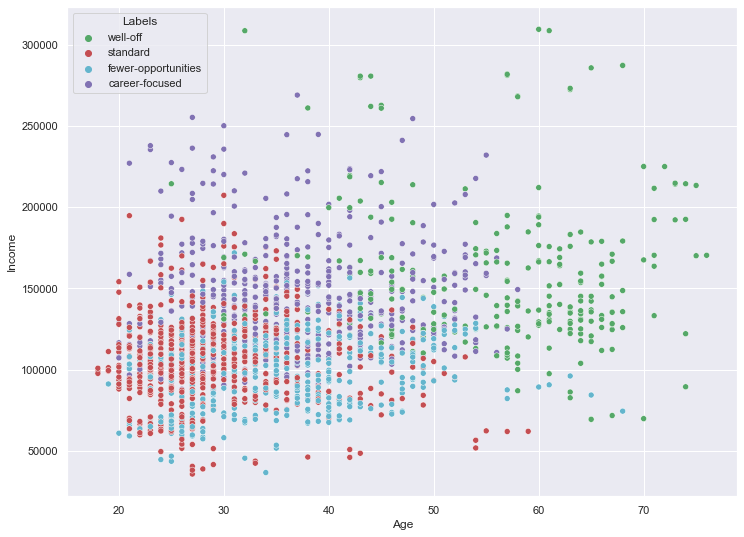

In [19]:
plt.figure(figsize=(12, 9))

x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']

sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.show()

### 5.3 PCA

In [20]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [21]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

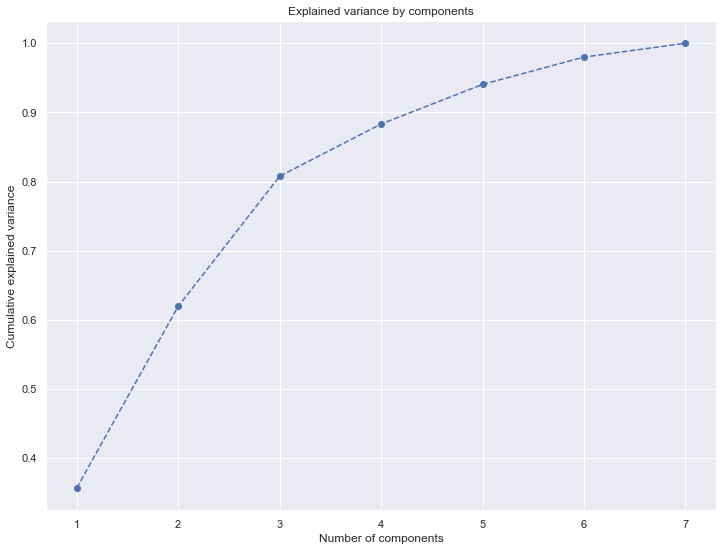

In [22]:
plt.figure(figsize=(12, 9))

plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()

In [23]:
pca = PCA(n_components=3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [24]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [25]:
df_raw.columns.values

array(['Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'], dtype=object)

In [26]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns=df_raw.columns,
                            index=['C1', 'C2', 'C3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
C2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
C3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


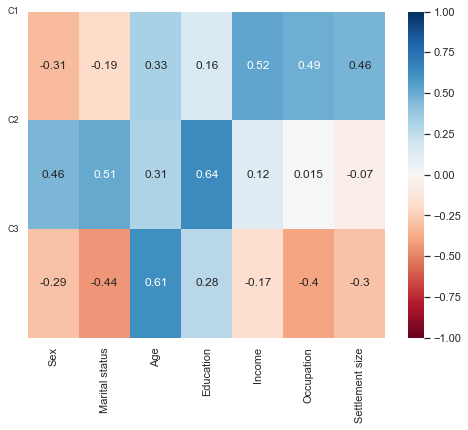

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_pca_comp, vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.yticks([0,1,2], ['C1', 'C2', 'C3'], rotation=0, fontsize=9)
plt.show()

In [28]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [29]:
scores_pca = pca.transform(segmentation_std)

### 5.4 $k$-means on PCA components

In [30]:
wcss = []

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

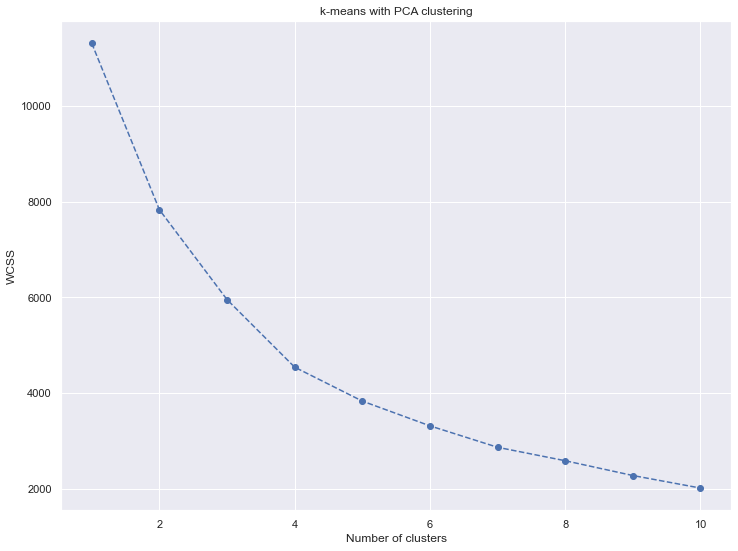

In [31]:
plt.figure(figsize=(12, 9))

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.title('k-means with PCA clustering')
plt.show()

In [32]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [33]:
df_segm_pca_kmeans = pd.concat([df_raw.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['C1', 'C2', 'C3']
df_segm_pca_kmeans['Segment k-means PCA'] = kmeans_pca.labels_

In [34]:
df_segm_pca_kmeans_analysis = df_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
df_segm_pca_kmeans_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,C1,C2,C3
Segment k-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [35]:
df_segm_pca_kmeans_analysis['N Obs'] = df_segm_pca_kmeans[['Segment k-means PCA', 'Sex']].groupby(['Segment k-means PCA']).count()
df_segm_pca_kmeans_analysis['Prop Obs'] = df_segm_pca_kmeans_analysis['N Obs']/df_segm_pca_kmeans_analysis['N Obs'].sum()
df_segm_pca_kmeans_analysis = df_segm_pca_kmeans_analysis.rename({3: 'well-off', 2: 'fewer-opportunities', 0: 'standard', 1: 'career-focused'})
df_segm_pca_kmeans_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,C1,C2,C3,N Obs,Prop Obs
Segment k-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career-focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer-opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [36]:
df_segm_pca_kmeans['Labels'] = df_segm_pca_kmeans['Segment k-means PCA'].map({3: 'well-off',
                                                                          2: 'fewer-opportunities',
                                                                          0: 'standard',
                                                                          1: 'career-focused'})

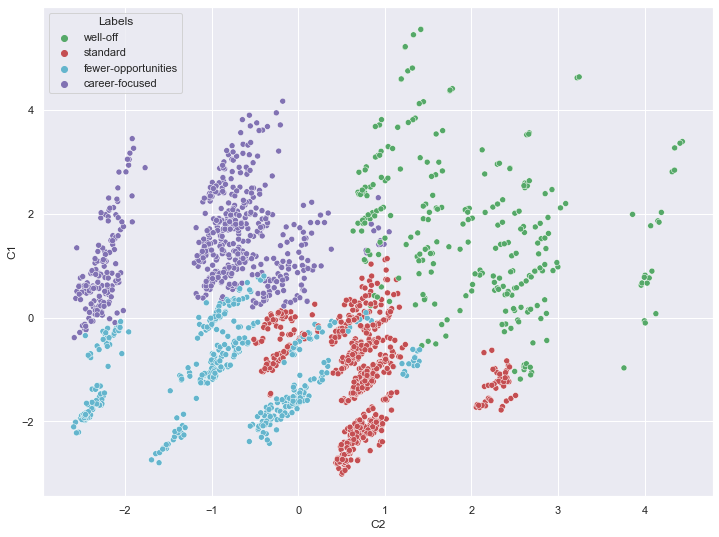

In [37]:
plt.figure(figsize=(12, 9))

x_axis = df_segm_pca_kmeans['C2']
y_axis = df_segm_pca_kmeans['C1']

sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.show()

## 6.0 Saving models

In [38]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [39]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [40]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))